# Multiple Linear Regression through ANN on red and white Californian Whine Quality.

- Objective: Predict Whine Quality through a Multiple linear Regression Model trained with ANN. 
- Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality
- Tools: Python, Pandas, Numpy, Matplotlib, Tensorflow, Keras, Seaborn, Scikit-learn
- Algorithms: Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from keras.callbacks import TensorBoard

In [2]:
#Load both datasets.
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")

#Since we have 2 datasets, we shall review if both have the same list of attributes. 
print(red_wine_data.columns.all() == white_wine_data.columns.all())

#Since both datasets have the same attributes, we will merge them and work with that dataset.  
#Before doing that, we will add an extra column that delimits whine type 
red_wine_data["whine type"] = 0
white_wine_data["whine type"] = 1

frames = [red_wine_data, white_wine_data]
data = pd.concat(frames)

data

True


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,whine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
whine type              True
dtype: bool


<Axes: >

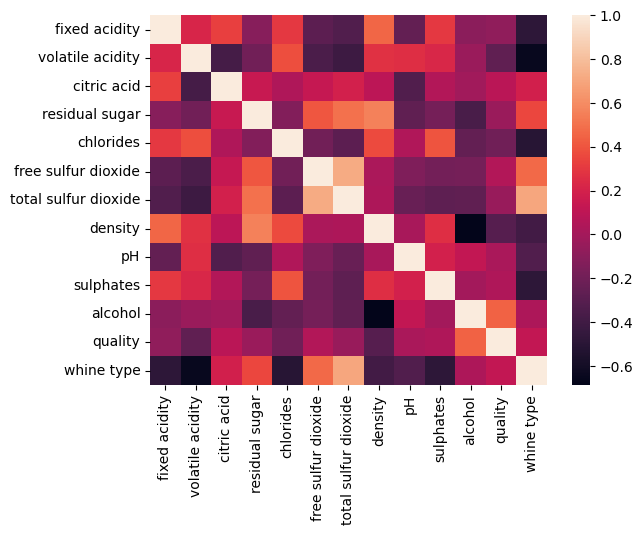

In [3]:
#Checking for null values. 
data.isnull().sum()

#Since we have a complete dataset, let's check if our data is numeric type. 
print(data.apply(lambda x: pd.to_numeric(x, errors="coerce").notnull().all()))

#We review the correlationship between all the attributes and Quality. 
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

As we can see in the correlation matrix, the most related attributes to whine quality are:

    - citric acid
    - free sulfur dioxide
    - pH
    - sulphates
    - alcohol
    - tipo de vino
 
which is why we will eliminate all attributes that are no part of this list. 

In [4]:
cols_to_delete = ["fixed acidity", "volatile acidity", "residual sugar", "chlorides", "total sulfur dioxide", "density"]
data = data.drop(columns=cols_to_delete)
data

,citric acid,free sulfur dioxide,pH,sulphates,alcohol,quality,whine type
0,0.00,11.0,3.51,0.56,9.4,5,0
1,0.00,25.0,3.20,0.68,9.8,5,0
2,0.04,15.0,3.26,0.65,9.8,5,0
3,0.56,17.0,3.16,0.58,9.8,6,0
4,0.00,11.0,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...
4893,0.29,24.0,3.27,0.50,11.2,6,1
4894,0.36,57.0,3.15,0.46,9.6,5,1
4895,0.19,30.0,2.99,0.46,9.4,6,1
4896,0.30,20.0,3.34,0.38,12.8,7,1


<BarContainer object of 7 artists>

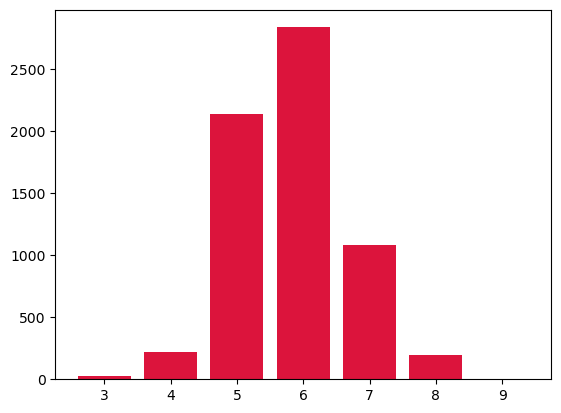

In [5]:
#We check the classes balance 
#In order to have that, we must first get the classes and the counts of each.
quality, counts = np.unique(data["quality"], return_counts=True)

plt.bar(quality, counts, color="crimson")

As we can see, the dataset is unbalanced. To fix this, we will apply SMOTE technique. 

In [6]:
#to apply SMOTE Technique, we must first delimit X and Y. 
X = data.drop(columns="quality")
y = data["quality"].to_numpy()

In [7]:
#we apply SMOTE Techninque. 
smote = SMOTE(sampling_strategy="auto", k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X,y)

<BarContainer object of 7 artists>

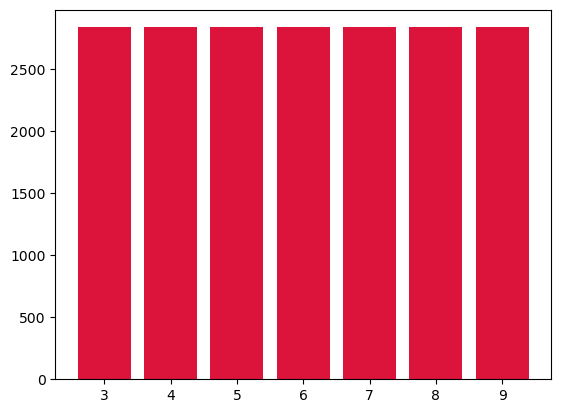

In [8]:
#we check that everything runned smoothly. 
quality, counts = np.unique(y_resampled, return_counts=True)

plt.bar(quality, counts, color="crimson")

In [9]:
#We Standardize the data 
X_scaled = preprocessing.StandardScaler().fit_transform(X_resampled)

#We split data into training, testing and validating set. 
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.10, random_state=0, shuffle=True)
x_train, x_val , y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=0, shuffle=True)

In [10]:
#We configure the ANN. 
#As we could see in the correlation matrix, upon the characteristics that we chose, there are some that are not that correlated with our target value, but
#they correlated with some other picked characteristics, which is why, we will penalize the training with L1. 

layers = [
    keras.layers.Dense(
        units=6,
        input_shape=(6,),
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.relu, 
        kernel_regularizer=keras.regularizers.l1(l1=0.12)),
    keras.layers.Dense(
        units=24,
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.relu, 
        kernel_regularizer=keras.regularizers.l1(l1=0.12)),
    keras.layers.Dense(
        units=6,
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.relu,
        kernel_regularizer=keras.regularizers.l1(l1=0.12)),
    keras.layers.Dense(
        units=1,
        kernel_initializer="he_uniform",
        activation=tf.keras.activations.linear)
        ]

model = keras.Sequential(layers, name="whine_quality")

# Compilation and configuration of the optimzation algorithm and loss function
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss="mse",
    metrics=[keras.metrics.RootMeanSquaredError(), "mse", "mae"]
    )
    
model.summary()

Model: "whine_quality"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 24)                168       
                                                                 
 dense_2 (Dense)             (None, 6)                 150       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Training of ANN
#TF board callback definition
tensorboard_callback = TensorBoard(log_dir="whine_quality")

#Learning process
model.fit(
    x_train,
    y_train,
    epochs=50, 
    batch_size=250, 
    validation_data=(x_val, y_val), 
    callbacks=[tensorboard_callback]
    )

Epoch 1/50
65/65 [==============================] - 2s 9ms/step - loss: 18.4484 - root_mean_squared_error: 2.4015 - mse: 5.7674 - mae: 1.7281 - val_loss: 13.4135 - val_root_mean_squared_error: 1.4733 - val_mse: 2.1707 - val_mae: 1.1651
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 12.0759 - root_mean_squared_error: 1.4264 - mse: 2.0346 - mae: 1.1426 - val_loss: 10.8676 - val_root_mean_squared_error: 1.4200 - val_mse: 2.0165 - val_mae: 1.1463
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 9.8241 - root_mean_squared_error: 1.4023 - mse: 1.9663 - mae: 1.1321 - val_loss: 8.9100 - val_root_mean_squared_error: 1.4157 - val_mse: 2.0041 - val_mae: 1.1390
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 8.0736 - root_mean_squared_error: 1.3968 - mse: 1.9510 - mae: 1.1310 - val_loss: 7.4856 - val_root_mean_squared_error: 1.4536 - val_mse: 2.1129 - val_mae: 1.1865
Epoch 5/50
65/65 [==============================] - 0s 3ms/s

56/56 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Residuals')

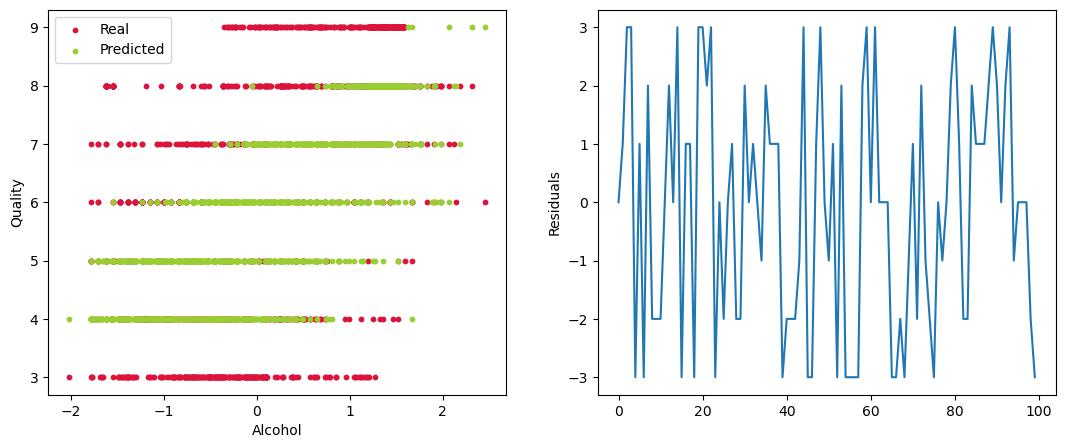

In [15]:
#we plot our predictions vs. our real data. 
y_pred = model.predict(x_val)
y_pred = np.round(y_pred)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].scatter(x_val[:,4], y_val, s=10, c="crimson", label="Real")
axes[0].scatter(x_val[:,4], y_pred, s=10, c="yellowgreen", label="Predicted")
axes[0].set_ylabel("Quality", size=10)
axes[0].set_xlabel("Alcohol", size=10)
axes[0].legend()

residuals = (y_val - y_pred).flatten()
#residuals
axes[1].plot(residuals[:100])
axes[1].set_ylabel("Residuals", size=10)

As we can see, our model adjusts fine, our rmse are low and the predictions get most of the classes. However, it presents problems to recognize whine qualities 3, 8 and 9. This could be, because these where the types we were lacking on in the first place, therefore eventhough we balanced the dataset, we didn't had much of a variety to create more dynamic data. 

63/63 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Residuals')

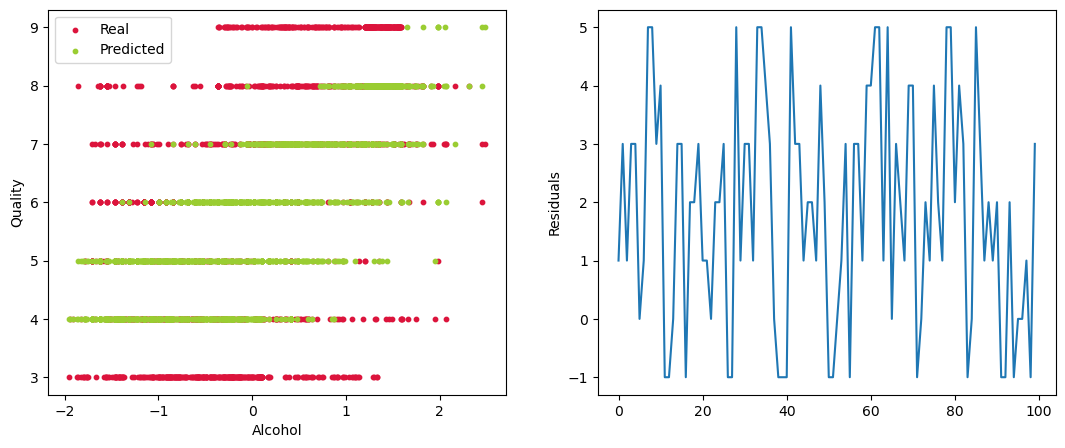

In [18]:
#Now it´s time to test it
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].scatter(x_test[:,4], y_test, s=10, c="crimson", label="Real")
axes[0].scatter(x_test[:,4], y_pred, s=10, c="yellowgreen", label="Predicted")
axes[0].set_ylabel("Quality", size=10)
axes[0].set_xlabel("Alcohol", size=10)
axes[0].legend()

residuals = (y_test - y_pred).flatten()
#residuals
axes[1].plot(residuals[:100])
axes[1].set_ylabel("Residuals", size=10)

As we can see, the model performs the same as in the validation data, it fits well, but it also presents the same problems to identify whine quality 3, 8 and 9. This, as we explained earlier, could be due to the quantity, quality and variety of the data. 